In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Rubelita


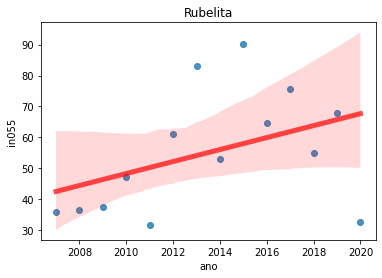

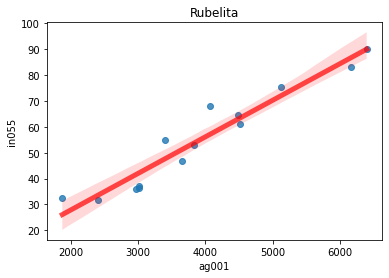

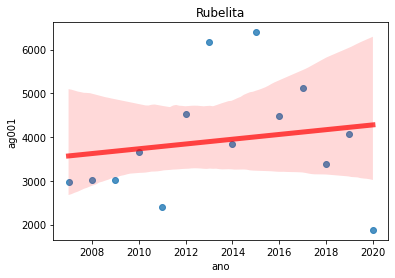

In [41]:
from matplotlib.pyplot import title


data = pd.ExcelFile("database.xlsx")
base_de_dados = pd.read_excel(data)

nome_mun = "Rubelita"
data_mun = base_de_dados.loc[base_de_dados["mun"]== nome_mun]
data_mun.head()
print(nome_mun)
sns.regplot(x=data_mun["ano"], y=data_mun["in055"], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title = nome_mun)
plt.show()

sns.regplot(x=data_mun["ag001"], y=data_mun["in055"], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title = nome_mun)
plt.show()

sns.regplot(x=data_mun["ano"], y=data_mun["ag001"], line_kws={"color":"r","alpha":0.7,"lw":5}).set(title = nome_mun)
plt.show()




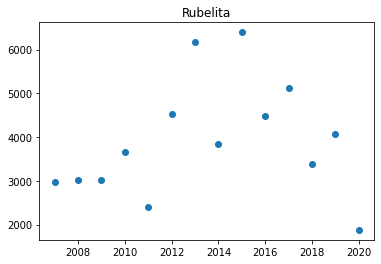

[-5.69800824e+01  2.29513429e+05 -2.31112801e+08]
        2
-56.98 x + 2.295e+05 x - 2.311e+08


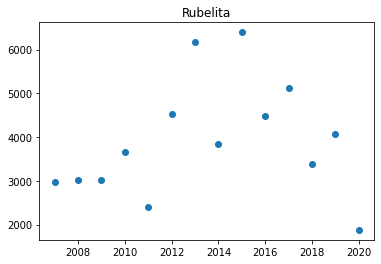

2797.517857015133


In [42]:
from numpy import poly1d


x = data_mun["ano"]
y = data_mun["ag001"]

plt.scatter(x,y,)
plt.title(nome_mun)
plt.show()

curve = np.polyfit(x,y,2)
poly = poly1d(curve)

print(curve)
print(poly)
plt.scatter(x,y)
plt.title(nome_mun)
plt.show()
print(poly(2020))
 



In [124]:
from pyparsing import col


bd = base_de_dados
bd.head()
municipios = base_de_dados["mun"].unique()
#municipios = ["Botumirim","Bocaiúva", "Águas Vermelhas"]

projecao = pd.DataFrame(columns=["cod_mun","mun","ag001","pop_proj","diff", "percent", "poly"])


ano = 2020
 
for i in municipios:
    #print(i)
    data_mun = bd[bd["mun"]== i]
    #print(data_mun)

    x = data_mun["ano"]
    y = data_mun["ag001"]

    ag001_2020 = data_mun.iloc[1]["ag001"]
    
    #print(ag001_2020)
    data_mun.drop(data_mun[data_mun.ano == 2020].index)
    curve = np.polyfit(x,y,3)
    poly = poly1d(curve)

    #print(poly)

    cod_mun = data_mun.iloc[1]["cod_mun"]
    
    
    pop_proj = poly(ano)
    #print(pop_proj)
   
    difenca = round(pop_proj) - ag001_2020
    percent = difenca/ag001_2020

   
    projecao.loc[len(projecao)] = [cod_mun, i, ag001_2020, round(pop_proj), difenca, percent, curve]

#projecao["percent"] = projecao["percent"].astype(float).map("{:.2%}".format)
#projecao.to_excel("projecao_muinicipios_2.xlsx")
projecao.head()

,cod_mun,mun,ag001,pop_proj,diff,percent,poly
0,310100,Águas Vermelhas,9515,9678,163,0.017131,"[-1.2885472702539866, 7811.9457475852, -157867..."
1,310665,Berizal,2684,2678,-6,-0.002235,"[-0.6959241520392574, 4206.922834940026, -8477..."
2,310730,Bocaiúva,45870,46456,586,0.012775,"[10.850849829403252, -65491.639439108105, 1317..."
3,310825,Bonito de Minas,2501,2512,11,0.004398,"[-0.20972164767700519, 1266.3826787394357, -25..."
4,310850,Botumirim,3375,2807,-568,-0.168296,"[-7.200397240263769, 43456.79211265605, -87425..."


In [44]:
bd.head()

,cod_mun,mun,ano,pop_tot,pop_urb,ag001,ag026,in023,in055
0,310100,Águas Vermelhas,2020,13599,9557,9541,9541,99.8,70.16
1,310100,Águas Vermelhas,2019,13539,9515,9515,9515,100.0,70.28
2,310100,Águas Vermelhas,2018,13477,9472,9472,9472,100.0,70.28
3,310100,Águas Vermelhas,2017,13576,9541,9541,9541,100.0,70.28
4,310100,Águas Vermelhas,2016,13513,9497,9497,9497,100.0,70.28


/Users/victorhugo/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='percent', ylabel='Density'>

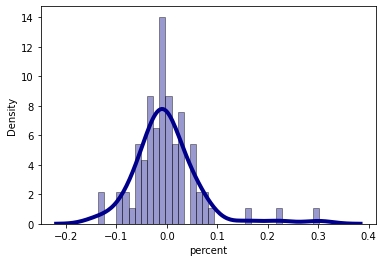

In [45]:
sns.distplot(projecao["percent"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
             

In [123]:
import statistics
#mun = input("digite o nome do município: ")

bd_ml = bd[bd["mun"]== mun]
bd_ml =  bd_ml.drop(bd_ml[bd_ml.ano == 2020].index)
municipios = base_de_dados["mun"].unique()

ensaio_ml = pd.DataFrame(columns=["cod_mun","mun","n_ensaio","pop_proj"])

ano_proj = 2020

ano = bd_ml["ano"]
ag001 = bd_ml["ag001"]

x = np.array(ano).reshape(-1,1)
y = np.array(ag001)
valores_ml = []



for i in range (19):

    x_train, x_test, y_train, y_test = train_test_split(x, y)

    curve_ml = np.polyfit(x_train.flatten(),y_train.flatten(),3)
    poly_ml = poly1d(curve_ml)
    #modelo_ml = linear_model.LinearRegression()
    #modelo.fit(x_train, y_train)
    print(poly_ml(2020))
    #ano = np.array([2020])
    #ano = ano.reshape(1,-1)
    valores_ml.append(poly_ml(2020))

    ensaio_ml = pd.DataFrame(columns=["cod_mun","mun","n_ensaio","pop_proj"])
    projecao.loc[len(projecao)] = [cod_mun, i, ag001_2020, round(pop_proj), difenca, percent, curve]


media = np.array(valores_ml).mean()
mediana = statistics.median(valores_ml)
print(media,mediana)

9684.858521431684
9729.99990862608
9637.15093754232
10355.714053571224
10349.182818457484
10020.823763608932
9893.17500962317
9870.900048732758
10417.79362347722
9684.858521342278
10234.74810296297
10449.397138118744
10432.221728086472
10242.368016153574
11200.983347833157
10052.02351012826
10592.981035679579
10346.415257275105
10341.668719351292
10186.171792736963 10242.368016153574


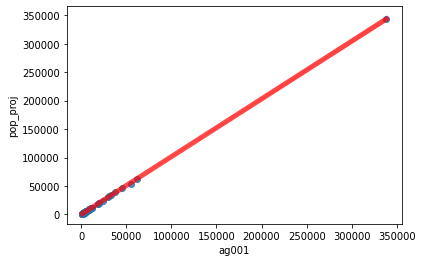